In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

import cv2
import numpy as np
from keras.models import load_model

In [ ]:


# # Initialize the model
# cnn_model = Sequential()

# # Add the first convolutional layer
# cnn_model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(200, 300, 1), padding='same'))

# # Add the first max pooling layer
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add the second convolutional layer
# cnn_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))

# # Add the second max pooling layer
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten the tensor output from the previous layer
# cnn_model.add(Flatten())

# # Add the first fully connected layer
# cnn_model.add(Dense(256, activation='relu'))

# # Add a dropout layer
# cnn_model.add(Dropout(0.5))

# # Add the output layer
# cnn_model.add(Dense(3, activation='softmax'))

In [2]:
# improved model

# Initialize the model
cnn_model = Sequential()

# Add the first convolutional layer
cnn_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(200, 300, 1), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
cnn_model.add(Flatten())

# Add the first fully connected layer
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))

# Add the output layer
cnn_model.add(Dense(3, activation='softmax'))


In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 300, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 200, 300, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 150, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 100, 150, 32)      128       
 chNormalization)                                                
                                                        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_path = "/content/drive/MyDrive/Centrale/3A/Projet 3A/dataset_reel"

print(dataset_path)
labels = []
labels_size = []
for i in os.listdir(dataset_path):
  if os.path.isdir(os.path.join(dataset_path, i)):
    labels.append(i)
    labels_size.append(len(os.listdir(os.path.join(dataset_path, i))))
print(labels)
print(labels_size)


/content/drive/MyDrive/Centrale/3A/Projet 3A/dataset_reel
['rock', 'scissors', 'paper']
[746, 750, 712]


In [ ]:
dataset_path2 = "/content/drive/MyDrive/Centrale/3A/Projet 3A/dataset_synt"

print(dataset_path2)
labels2 = []
labels_size2 = []
for i in os.listdir(dataset_path2):
  if os.path.isdir(os.path.join(dataset_path2, i)):
    labels2.append(i)
    labels_size2.append(len(os.listdir(os.path.join(dataset_path2, i))))
print(labels2)
print(labels_size2)

/content/drive/MyDrive/Centrale/3A/Projet 3A/dataset_synt
['rock', 'paper', 'scissors']
[840, 840, 840]


In [ ]:
def random_rotation(image):
    angle = random.randint(0, 90)
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

def random_flip(image):
    flip_type = random.choice([-1, 0, 1]) # -1: horizontal and vertical, 0: vertical, 1: horizontal
    return cv2.flip(image, flip_type)

In [ ]:
labels

['rock', 'scissors', 'paper']

In [ ]:
#load the images
images = []
images_labels = []

for i in range(len(labels)):
  for j in os.listdir(os.path.join(dataset_path, labels[i])):
    img = cv2.imread(os.path.join(dataset_path, labels[i], j), 0)
    img = cv2.resize(img, (300, 200))
    images.append(img)
    images_labels.append(i)
    img = random_rotation(img)
    img = random_flip(img)
    images.append(img)
    images_labels.append(i)
images = np.array(images)
images_labels = np.array(images_labels)


In [ ]:
print(images.shape)
print(images_labels.shape)

(4416, 200, 300)
(4416,)


In [ ]:
#load the images
new_images = []
new_labels = []
for i in range(len(labels)):
  for j in os.listdir(os.path.join(dataset_path2, labels[i])):
    img = cv2.imread(os.path.join(dataset_path2, labels[i], j), 0)
    img = cv2.resize(img, (300, 200))
    new_images.append(img)
    new_labels.append(i)
    img = random_rotation(img)
    img = random_flip(img)
    new_images.append(img)
    new_labels.append(i)
new_images = np.array(new_images)
new_labels = np.array(new_labels)

In [ ]:
print(new_images.shape)
print(new_labels.shape)

(5040, 200, 300)
(5040,)


In [ ]:
images = np.concatenate((images, new_images), axis=0)
images_labels = np.concatenate((images_labels, new_labels), axis=0)


In [ ]:
print(images.shape)
print(images_labels.shape)

(9456, 200, 300)
(9456,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, images_labels, test_size=0.2, random_state=42)

# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 200, 300, 1)
X_test = X_test.reshape(X_test.shape[0], 200, 300, 1)

# Train the model
cnn_model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))


Epoch 1/15
60/60 [==============================] - 363s 6s/step - loss: 0.0747 - accuracy: 0.9738 - val_loss: 0.2121 - val_accuracy: 0.9482
Epoch 2/15
60/60 [==============================] - 361s 6s/step - loss: 0.0751 - accuracy: 0.9717 - val_loss: 0.1520 - val_accuracy: 0.9582
Epoch 3/15
60/60 [==============================] - 359s 6s/step - loss: 0.0469 - accuracy: 0.9807 - val_loss: 0.1697 - val_accuracy: 0.9604
Epoch 4/15
60/60 [==============================] - 362s 6s/step - loss: 0.0427 - accuracy: 0.9820 - val_loss: 0.1919 - val_accuracy: 0.9556
Epoch 5/15
60/60 [==============================] - 361s 6s/step - loss: 0.0384 - accuracy: 0.9837 - val_loss: 0.2190 - val_accuracy: 0.9598
Epoch 6/15
60/60 [==============================] - 362s 6s/step - loss: 0.0446 - accuracy: 0.9847 - val_loss: 0.1792 - val_accuracy: 0.9577
Epoch 7/15
60/60 [==============================] - 361s 6s/step - loss: 0.0329 - accuracy: 0.9874 - val_loss: 0.2083 - val_accuracy: 0.9641
Epoch 8/15
60

In [ ]:
# Save the model
cnn_model.save('/content/cnn_model.h5')
print('Model saved as cnn_model.h5')


Model saved as cnn_model.h5


In [ ]:

# # Load the model
# model = load_model('cnn_model.h5')

# # Initialize the camera
# cap = cv2.VideoCapture(0)

# # try the model on live video
# while cap.isOpened():
#     success, image = cap.read()
#     if not success:
#         print("Ignoring empty camera frame.")
#         continue

#     img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     img = cv2.resize(img, (300, 200))
#     img = np.array(img).reshape(-1, 200, 300, 1)

#     pred = model.predict(img)
#     # Get the index of the class label
#     pred = np.argmax(pred)
#     # Display the class label
#     cv2.putText(image, labels[pred], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
#     # Display the frame
#     cv2.imshow('Hand Gesture Recognition', image)
#     # Break the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# cap.release()
# cv2.destroyAllWindows()

In [ ]:

# Load the model
model = cnn_model
# model = load_model('/content/cnn_model.h5')

dataset_path = '/content/drive/MyDrive/Centrale/3A/Projet 3A/dataset_centrale'

print(dataset_path)
labels = []
for i in os.listdir(dataset_path):
  if os.path.isdir(os.path.join(dataset_path, i)):
    labels.append(i)
print(labels)



/content/drive/MyDrive/Centrale/3A/Projet 3A/dataset_centrale
['rock', 'paper', 'scissors', 'augmented']


In [ ]:

dico = {
  'rock': 0,
  'paper': 2,
  'scissors': 1
}

y_test = []
y_pred = []
for label in labels:
  if label != 'augmented' :
    label_dir = os.path.join(dataset_path, label)
    # STEP 3: Load the input image.
    example_filenames = os.listdir(label_dir)
    for i in range(len(example_filenames)):
      image_path = os.path.join(label_dir, example_filenames[i])
      image = cv2.imread(image_path)
      img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (300, 200))
      img = np.array(img).reshape(-1, 200, 300, 1)

      pred = model.predict(img)
      # Get the index of the class label
      y_pred.append(np.argmax(pred))
      y_test.append(dico[label])

print(y_pred)
print(y_test)

1/1 [==============================] - 0s 39ms/step
[2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]])/len(y_test)
print(accuracy)

0.543661971830986


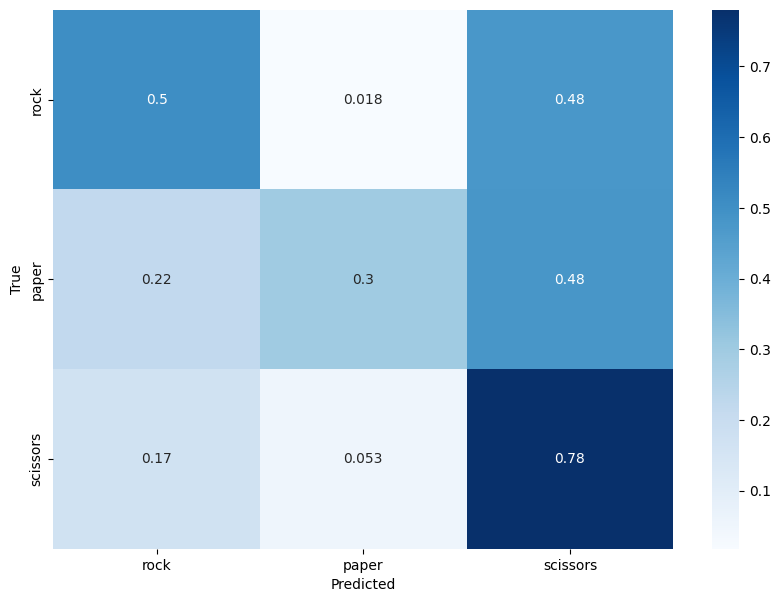

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

labels = ['rock', 'paper', 'scissors']

cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
